In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

In [9]:
data = pd.read_csv("/content/restaurantData.csv")
data.head()

,resource,menu,price,location
0,madchef,Chicken Cheese Bombs,299,Wari
1,madchef,Spicy Cajun Fries,159,Wari
2,madchef,Fries - Salt & Pepper,139,Wari
3,madchef,Onion Rings,149,Wari
4,madchef,Spicy Garlic Mushrooms 🌶,269,Wari


In [10]:
data.describe()

,price
count,2172.000000
mean,617.857735
std,380.391371
min,32.000000
25%,346.500000
50%,479.000000
75%,819.000000
max,1529.000000


In [11]:
madchef_data = data[data.resource=='madchef']
madchef_data = madchef_data.drop_duplicates(subset = "menu")
pizzahut_data = data[data.resource=='pizzahutbd']
pizzahut_data = pizzahut_data.drop_duplicates(subset = "menu")
top_madchef = madchef_data.nlargest(10, ['price'])
top_pizzahut = pizzahut_data.nlargest(10, ['price'])

Text(0.5, 1.0, 'Price VS Menu Items (Madchef BD)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127798 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127798 missing from current font.
  font.set_text(s, 0, flags=flags)


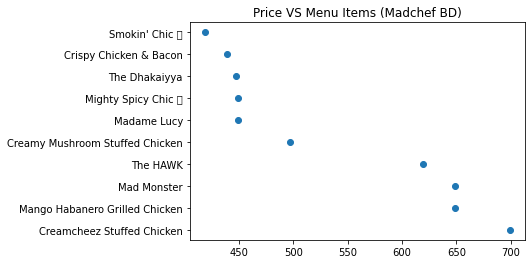

In [12]:
plt.scatter(top_madchef.price, top_madchef.menu)
plt.title("Price VS Menu Items (Madchef BD)")

Text(0.5, 1.0, 'Price VS Menu Items (PizzaHut BD)')

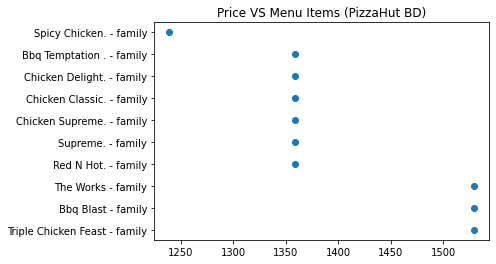

In [13]:
plt.scatter(top_pizzahut.price, top_pizzahut.menu)
plt.title("Price VS Menu Items (PizzaHut BD)")

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pickle

In [15]:
data['price'] = pd.to_numeric(data['price'])
le = LabelEncoder()
columns = ['resource', 'menu', 'location']
for column in columns:
  data[column] = le.fit_transform(data[column])
data

,resource,menu,price,location
0,0,23,299,25
1,0,96,159,25
2,0,54,139,25
3,0,76,149,25
4,0,101,269,25
...,...,...,...,...
2167,1,22,209,12
2168,1,59,289,12
2169,1,78,35,12
2170,1,72,32,12


In [16]:
target = data['resource']
features = data.drop(['resource'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=.20)

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
lr.score(X_test, y_test)

0.7954022988505747

In [39]:
pkl_file_name = "restaurant_lr_model.pkl"
with open(pkl_file_name, 'wb') as file:
  pickle.dump(lr, file)

In [32]:
X_test

,menu,price,location
1653,5,259,6
342,46,299,4
1343,99,379,26
765,2,1239,1
865,34,1359,23
...,...,...,...
1337,32,329,26
1251,40,809,21
256,46,299,0
1473,10,479,20


In [40]:
y_pred = lr.predict(X_test)

In [41]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


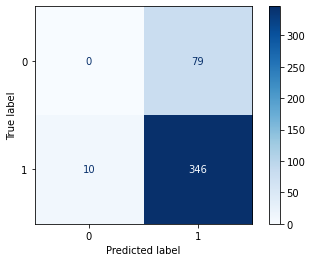

In [47]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)
plt.show()